# Q1. Problem Statement: Logistic Regression
## You are given a categorical dataset - "Heart Disease.csv"Load the dataset into a DataFrame Considering the "TanYearCHD" column as the target variable, perform the following tasks:

1. Explore the "Heart Disease.csv" dataset, identify the null values and fill them with the mean value of their respective columns

2 Split the data into lest and train parts using train_test_split() function in 80:20 ratio (80% train, 20% test)

3. Perform scaling of numenic data using the StandardScaler() function

4. Build a Logistic regression model using the test dataset and test the model using the test dataset

5. Print the classification report of the model

6. Calculate the confusion matrix and plot the same using a heatmap

7. Calculate and print the accuracy score of the model

8. Print the decision boundary for 8=0,0=1 and 2

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter("ignore")

Log_Reg = pd.read_csv("Heart_Disease.csv")
Log_Reg.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#Step - 1 Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Description

Log_Reg.head(10)
# Log_Reg.tail()
# Log_Reg.sample()
# Log_Reg.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [11]:
Log_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#Step - 4 Identifying The Null Value And Fitting Them With Mean Of Their Respective COlumns

Log_Reg.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
Log_Reg = Log_Reg.apply(lambda x:x.fillna(x.mean()),axis=0)

In [15]:
# method 2

# df = pd.DataFrame(Log_Reg)

# # Calculate the mean of each column
# mean_values = df.mean()

# Replace null values with the mean of each column
# df_imputed = df.replace(np.nan ,mean_values)

# print(df_imputed)

In [17]:
Log_Reg.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Step - 5 FInding Uniqueness In Each Column

In [25]:
#Unique VAlues

Log_Reg.nunique()/Log_Reg.shape[0]


male               0.000472
age                0.009202
education          0.001180
currentSmoker      0.000472
cigsPerDay         0.008023
BPMeds             0.000708
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058754
sysBP              0.055215
diaBP              0.034450
BMI                0.321850
heartRate          0.017461
glucose            0.033978
TenYearCHD         0.000472
dtype: float64

In [27]:
# Log_Reg.shape[0]
# Log_Reg.shape[1]

# Log_Reg.nunique()

In [29]:
#Step - 6 Importing LIbrarys For Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [30]:
#Step - 7 : Define Input and Output Variable For test-train split

In [33]:
##Defining Variables x,y

x=Log_Reg.drop("TenYearCHD",axis=1)
y=Log_Reg["TenYearCHD"]
# print("Columns In X:", x.columns)
# print("Y :",y)
# print("Shape Of X :",x.shape)
# print("SHape Of y :",y.shape)

In [35]:
#Step - 8: Spliting The Data Into Test Train Part In 80-20

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
# x_train,x_test,y_train,y_test

In [37]:
import sys

print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(x_train))
print("sizeof input test data is:", sys.getsizeof(x_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

After splitting the data-
size of input train data is: 433952
sizeof input test data is: 108576
size of output train data is: 54272
size of output test data is: 13600


In [39]:
#Step - 9 Scaling The Data Using Standard Scaler Function
#Scalling Data
## Scaling the data

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# x_train = pd.DataFrame(x_train,columns=x.columns)
# x_test = pd.DataFrame(x_test,columns=x.columns)

In [41]:
#Step - 10 Training The Model Using Logistic Regression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
#Step - 10 Testing The MOdel Using Test DataSet
#Predict Data
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
#Step 12 : Printing The Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



COnfusion Matrix is 
 [[708   2]
 [129   9]]


Text(58.222222222222214, 0.5, 'Predict Label')

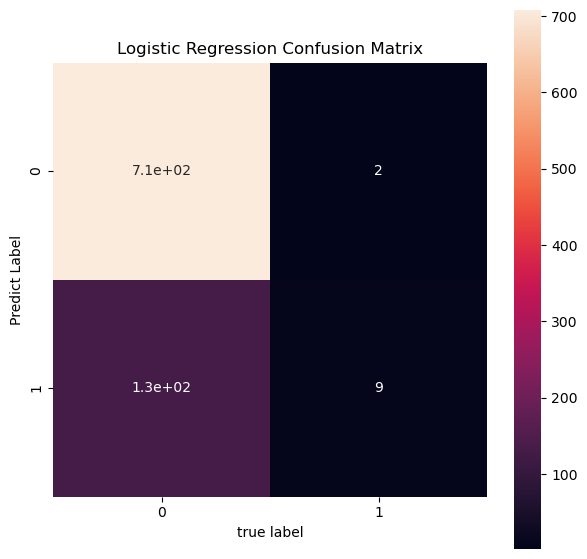

In [57]:
#Step - 13 Printing The Confusion Metrix

conf_mat = confusion_matrix(y_test,y_pred)
print("COnfusion Matrix is \n",conf_mat)

#Plotting Confusion Metrix

plt.figure(figsize=(7,7))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_mat , square=True,annot=True)
plt.xlabel("true label")
plt.ylabel("Predict Label")

In [49]:
#Step - 14 Printing Accuracy Score.
print("Accuracy Score : ", accuracy_score(y_test,y_pred))

#percentage Accurate
print("Accuracy :", round(100*accuracy_score(y_test,y_pred)),"%")

Accuracy Score :  0.8455188679245284
Accuracy : 85 %


In [51]:
#Step - 15 Printing The Decision Boundry
#For Theta_0:
print(model.intercept_) #Error Term / Intercept
#FOr Theta_1 And theta_2
print(model.coef_)

[-1.99468853]
[[ 0.21614832  0.52281074 -0.00366555  0.01636161  0.27133999  0.01710232
   0.08430277  0.16792233  0.05466051  0.09136101  0.28984636 -0.0897055
   0.03551763 -0.01975831  0.1263818 ]]
